<p><a href="https://stackoverflow.com/questions/2054130/what-is-advanced-sql" rel="noreferrer">[SOURCE]</a></p>
<div class="s-prose js-post-body" itemprop="text">
<h2>Basics</h2>

<hr>

<ol>
<li><code>SELECT</code>ing columns from a table</li>
<li>Aggregates: <code>COUNT</code>, <code>SUM</code>, <code>MAX</code>/<code>MIN</code>, <code>DISTINCT</code>, <code>GROUP BY</code>, <code>HAVING</code></li>
<li>Deletion: <code>DROP</code>, <code>TRUNCATE</code>, <code>DELETE</code> </li>
</ol>

<h2>Intermediate</h2>

<hr>

<ol start="4">
<li><code>JOIN</code>s, ANSI-89 and ANSI-92 syntax</li>
<li><code>UNION</code> vs <code>UNION ALL</code></li>
<li><code>NULL</code> handling: <code>COALESCE</code> &amp; Native NULL handling</li>
<li>Subqueries: <code>IN</code>, <code>EXISTS</code>, and inline views</li>
<li>Subqueries: Correlated</li>
<li><code>WITH</code> syntax: Subquery Factoring/CTE</li>
<li>Views</li>
</ol>

<h2>Advanced Topics</h2>

<hr>

<ul>
<li>Functions, Stored Procedures, Packages</li>
<li>Pivoting data: CASE &amp; PIVOT syntax</li>
<li>Hierarchical Queries</li>
<li>Cursors: Implicit and Explicit</li>
<li>Triggers</li>
<li>Dynamic SQL</li>
<li>Materialized Views</li>
<li>Query Optimization: Indexes</li>
<li>Query Optimization: Explain Plans</li>
<li>Query Optimization: Profiling</li>
<li>Data Modelling: Normal Forms, 1 through 3</li>
<li>Data Modelling: Primary &amp; Foreign Keys</li>
<li>Data Modelling: Table Constraints</li>
<li>Data Modelling: Link/Corrollary Tables</li>
<li>Full Text Searching</li>
<li>XML </li>
<li>Isolation Levels</li>
<li>Entity Relationship Diagrams (ERDs), Logical and Physical</li>
<li>Transactions: <code>COMMIT</code>, <code>ROLLBACK</code>, Error Handling</li>
</ul>
</div>
    
    
<p>The "Advanced SQL" requirement probably hints at <strong>knowledge and possibly proficiency in several of the new concepts</strong> such as:</p>
<ul>
<li>CTEs (Common Table Expressions)</li>
<li>UDFs (User Defined Functions)</li>
<li>Fulltext search extensions/integration</li>
<li>performance tuning with new partitionning schemes, filtered indexes, sparse columns...)</li>
<li>new data types (ex: GIS/spatial or hierarchical)</li>
<li>XML support / integration</li>
<li>LINQ</li>
<li>and a few more...   (BTW the above list is somewhat MSSQL-centric, but similar evolution is observed in most other DBMS platforms).</li>
</ul>

<div class="s-prose js-post-body" itemprop="text">
<p>Some "Advanced" features </p>

<ul>
<li>recursive queries</li>
<li>windowing/ranking functions</li>
<li>pivot and unpivot</li>
<li>performance tuning</li>
</ul>
</div>
    
<div class="s-prose js-post-body" itemprop="text">
<p>When you see them spelled out in requirements they tend to include:</p>

<ul>
<li>Views</li>
<li>Stored Procedures</li>
<li>User Defined Functions</li>
<li>Triggers</li>
<li>sometimes Cursors</li>
</ul>

<p>Inner and outer joins are a must but i rarely ever see it mentioned in requirements. And it's surprising how many so-called db professionals cannot get their head around a simple outer join.</p>
</div>

<pre class="lang-sql s-code-block"><code class="hljs language-sql"><span class="hljs-keyword">DECLARE</span> <span class="hljs-variable">@date</span> DATETIME
<span class="hljs-keyword">SELECT</span> <span class="hljs-variable">@date</span> <span class="hljs-operator">=</span> <span class="hljs-string">'10/31/09'</span>

<span class="hljs-keyword">SELECT</span>
      t1.EmpName,
      t1.Region,
      t1.TourStartDate,
      t1.TourEndDate,
      t1.FOrdDate,
      FOrdType  <span class="hljs-operator">=</span> <span class="hljs-built_in">MAX</span>(<span class="hljs-keyword">CASE</span> <span class="hljs-keyword">WHEN</span> o.OrderDate <span class="hljs-operator">=</span> t1.FOrdDate <span class="hljs-keyword">THEN</span> o.OrderType  <span class="hljs-keyword">ELSE</span> <span class="hljs-keyword">NULL</span> <span class="hljs-keyword">END</span>),
      FOrdTotal <span class="hljs-operator">=</span> <span class="hljs-built_in">MAX</span>(<span class="hljs-keyword">CASE</span> <span class="hljs-keyword">WHEN</span> o.OrderDate <span class="hljs-operator">=</span> t1.FOrdDate <span class="hljs-keyword">THEN</span> o.OrderTotal <span class="hljs-keyword">ELSE</span> <span class="hljs-keyword">NULL</span> <span class="hljs-keyword">END</span>),
      t1.LOrdDate,
      LOrdType  <span class="hljs-operator">=</span> <span class="hljs-built_in">MAX</span>(<span class="hljs-keyword">CASE</span> <span class="hljs-keyword">WHEN</span> o.OrderDate <span class="hljs-operator">=</span> t1.LOrdDate <span class="hljs-keyword">THEN</span> o.OrderType  <span class="hljs-keyword">ELSE</span> <span class="hljs-keyword">NULL</span> <span class="hljs-keyword">END</span>),
      LOrdTotal <span class="hljs-operator">=</span> <span class="hljs-built_in">MAX</span>(<span class="hljs-keyword">CASE</span> <span class="hljs-keyword">WHEN</span> o.OrderDate <span class="hljs-operator">=</span> t1.LOrdDate <span class="hljs-keyword">THEN</span> o.OrderTotal <span class="hljs-keyword">ELSE</span> <span class="hljs-keyword">NULL</span> <span class="hljs-keyword">END</span>)
  <span class="hljs-keyword">FROM</span> 
      (<span class="hljs-comment">--Derived table t1 returns the tourdates, and the order dates</span>
      <span class="hljs-keyword">SELECT</span>
            e.EmpId,
            e.EmpName,
            et.Region,
            et.TourStartDate,
            et.TourEndDate,
            FOrdDate <span class="hljs-operator">=</span> <span class="hljs-built_in">MIN</span>(o.OrderDate),
            LOrdDate <span class="hljs-operator">=</span> <span class="hljs-built_in">MAX</span>(o.OrderDate)
        <span class="hljs-keyword">FROM</span> #Employees e <span class="hljs-keyword">INNER</span> <span class="hljs-keyword">JOIN</span> #EmpTours et
          <span class="hljs-keyword">ON</span> e.EmpId <span class="hljs-operator">=</span> et.EmpId <span class="hljs-keyword">INNER</span> <span class="hljs-keyword">JOIN</span> #Orders o
          <span class="hljs-keyword">ON</span> e.EmpId <span class="hljs-operator">=</span> o.EmpId
       <span class="hljs-keyword">WHERE</span> et.TourStartDate <span class="hljs-operator">&lt;=</span> <span class="hljs-variable">@date</span>
         <span class="hljs-keyword">AND</span> (et.TourEndDate <span class="hljs-operator">&gt;</span> <span class="hljs-operator">=</span> <span class="hljs-variable">@date</span> <span class="hljs-keyword">OR</span> et.TourEndDate <span class="hljs-keyword">IS</span> <span class="hljs-keyword">NULL</span>)
         <span class="hljs-keyword">AND</span> o.OrderDate <span class="hljs-keyword">BETWEEN</span> et.TourStartDate <span class="hljs-keyword">AND</span> <span class="hljs-variable">@date</span>
       <span class="hljs-keyword">GROUP</span> <span class="hljs-keyword">BY</span> e.EmpId,e.EmpName,et.Region,et.TourStartDate,et.TourEndDate
      ) t1 <span class="hljs-keyword">INNER</span> <span class="hljs-keyword">JOIN</span> #Orders o
    <span class="hljs-keyword">ON</span> t1.EmpId <span class="hljs-operator">=</span> o.EmpId
   <span class="hljs-keyword">AND</span> (t1.FOrdDate <span class="hljs-operator">=</span> o.OrderDate <span class="hljs-keyword">OR</span> t1.LOrdDate <span class="hljs-operator">=</span> o.OrderDate)
 <span class="hljs-keyword">GROUP</span> <span class="hljs-keyword">BY</span> t1.EmpName,t1.Region,t1.TourStartDate,t1.TourEndDate,t1.FOrdDate,t1.LOrdDate
</code></pre>
<p><a href="http://www.sqlservercentral.com/Forums/Topic834780-8-1.aspx#bm835761" rel="noreferrer">(source of query)</a></p>

<h1>Basics</h1>

<h2>1. <code>SELECT</code>ing columns from a table</h2>

<h2>2. Aggregates: <code>COUNT</code>, <code>SUM</code>, <code>MAX</code>/<code>MIN</code>, <code>DISTINCT</code>, <code>GROUP BY</code>, <code>HAVING</code> </h2>

<h2>3. Deletion: <code>DROP</code>, <code>TRUNCATE</code>, <code>DELETE</code> </h2>

<ol>
<li><strong>DROP</strong></li>
    <ul>
        <li><strong>Syntex:</strong><code>DROP TABLE IF EXISTS &lt;TableA&gt;;</code><br></li>
        <li>The table structure, all records, and all related objects (indexes, constraints, etc) of the &lt;TableA&gt; are deleted permanently.</li>
        <li> Once dropped, data cannot be recovered using TCL/Commit -> ROLLBACK</li>
        <li> IF EXISTS is required as it gives error if the specified table doesnot exists.</li>
    </ul>

<li><strong>TRUNCATE</strong></li>
    <ul>
        <li><strong>Syntex:</strong><code>TRUNCATE TABLE &lt;TableA&gt;;</code><br></li>
        <li>TRUNCATE command deletes the data inside a table, but not the table itself</li>
        <li> All records are deleted in related tables  as well whenever <code>ON DELETE CASCADE</code> clause is used</li>
        <li>Data can be recovered if TCL/Commit -> ROLLBACK is used</li>
        <li><strong>TRUNCATE vs DELETE without WHERE<strong></li>
            <ul>
                <li>TRUNCATE ~ DELETE without WHERE</li>
                <li>TRUNCATE is much quicker then DELETE because DELETE performs row by row.</li>
                <li>TRUNCATE resets auto-increment values, while DELETE preserves auto-increment values</li>
            </ul>
    </ul>
<li><strong>DELETE</strong></li>
    <ul>
        <li><strong>Syntex:</strong><code>DELETE FROM &lt;TableA&gt; WHERE &lt;condition&gt;;</code><br></li>
        <li>Deletes all the rows from &lt;TableA&gt; that satisifies &lt;condition&gt;.</li>
        <li> Records are deleted in related tables  as well whenever <code>ON DELETE CASCADE</code> clause is used</li>
        <li>Data can be recovered if TCL/Commit -> ROLLBACK is used</li>
    </ul>
</ol>

<h1>Intermediate</h1>

<h2>4. JOINs</h2>

<p><a href="https://www.devart.com/dbforge/sql/sqlcomplete/sql-join-statements.html" rel="noreferrer">[SOURCE]</a></p>
<div class="col-md-9 pt-40">
   <h5 class="pt-0">Basic SQL JOIN types</h5>
   <p>
      SQL Server supports many kinds of different joins including <strong>INNER JOIN</strong>, <strong>SELF JOIN</strong>, <strong>CROSS JOIN</strong>, and <strong>OUTER JOIN</strong>. OUTER JOINS can further be divided into <strong>LEFT OUTER JOINS</strong>, <strong>RIGHT OUTER JOINS</strong>, and <strong>FULL OUTER JOINS</strong>.
   </p>
   <p>
   </p>
   <ol>
      <li><strong>SQL INNER JOIN</strong> creates a result table by combining rows that have matching values in two or more tables. </li>
      <li><strong>SQL LEFT OUTER JOIN</strong> includes in a result table unmatched rows from the table that is specified before the LEFT OUTER JOIN clause.</li>
      <li><strong>SQL RIGHT OUTER JOIN</strong> creates a result table and includes into it all the records from the right table and only matching rows from the left table.</li>       
      <li><strong>SQL FULL OUTER JOIN</strong> creates a result table and includes into it all the matching records from both tables as well as unmatching rows from both individual tables.</li>
      <li><strong>SQL SELF JOIN</strong> joins the table to itself and allows comparing rows within the same table.</li>
      <li><strong>SQL CROSS JOIN</strong> creates a result table containing paired combination of each row of the first table with each row of the second table.</li>
   </ol>
   <p></p>
</div>

<strong>SQL INNER JOIN</strong><br>
<code>SELECT * FROM &lt;TableA&gt; INNER JOIN &lt;TableB&gt; ON &lt;TableA&gt;.&lt;common_column_a&gt; = &lt;TableB&gt;.&lt;common_column_b&gt;;</code>
<br>NOTE::&lt;common_column&gt; column will appear two times in result

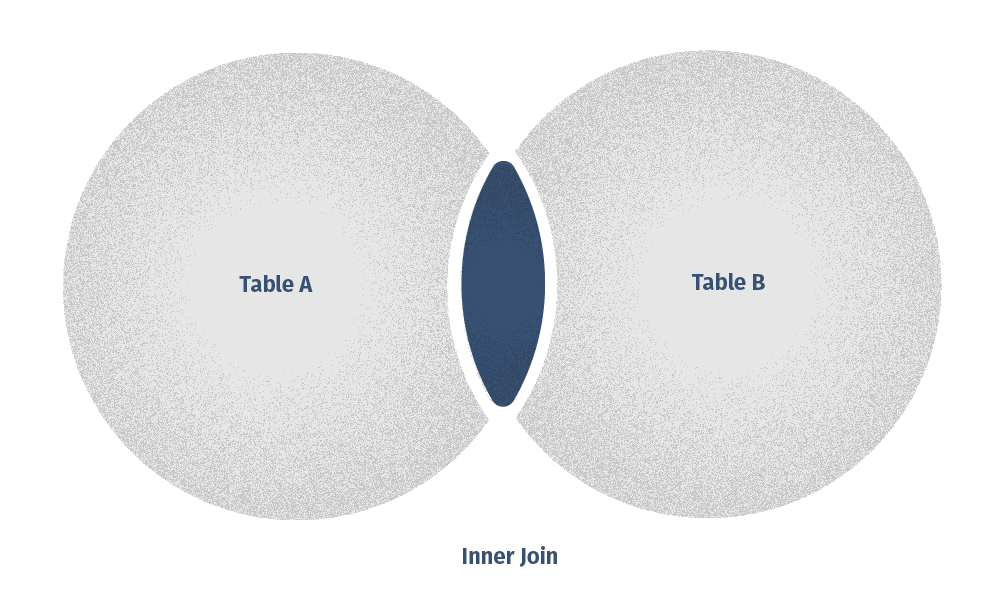
<h6><a href="https://www.devart.com/dbforge/sql/sqlcomplete/sql-join-statements.html" rel="noreferrer">[SOURCE]</a></h6>

<strong>SQL LEFT OUTER JOIN</strong><br>
<code>SELECT * FROM &lt;TableA&gt; LEFT OUTER JOIN &lt;TableB&gt; ON &lt;TableA&gt;.&lt;common_column_a&gt; = &lt;TableB&gt;.&lt;common_column_b&gt;;</code>
<br>NOTE::&lt;common_column&gt; column will appear two times in result

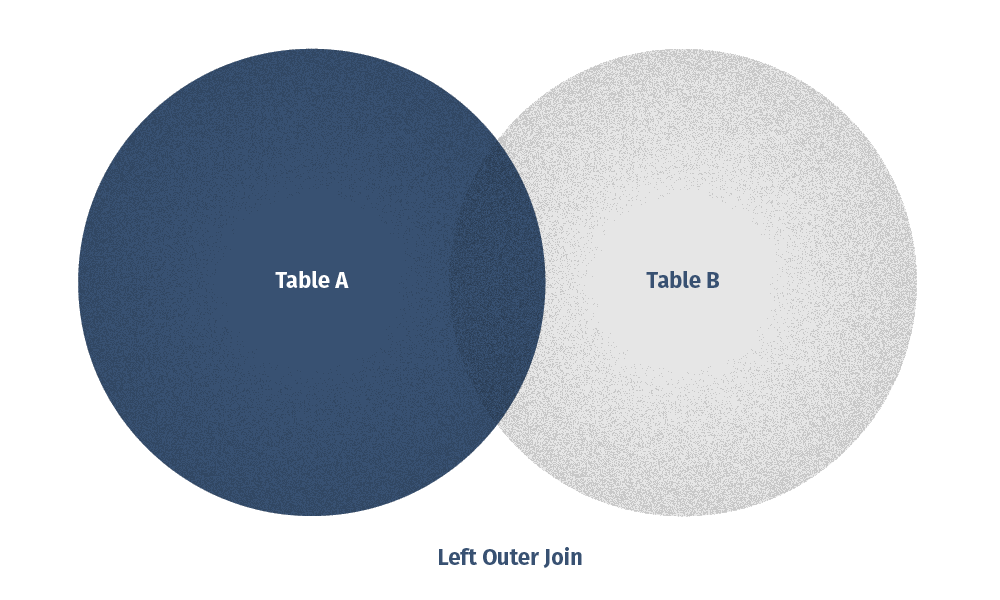
<h6><a href="https://www.devart.com/dbforge/sql/sqlcomplete/sql-join-statements.html" rel="noreferrer">[SOURCE]</a></h6>

<strong>SQL LEFT OUTER JOIN</strong><br>
<code>SELECT * FROM &lt;TableA&gt; RIGHT OUTER JOIN &lt;TableB&gt; ON &lt;TableA&gt;.&lt;common_column_a&gt; = &lt;TableB&gt;.&lt;common_column_b&gt;;</code>
<br>NOTE::&lt;common_column&gt; column will appear two times in result

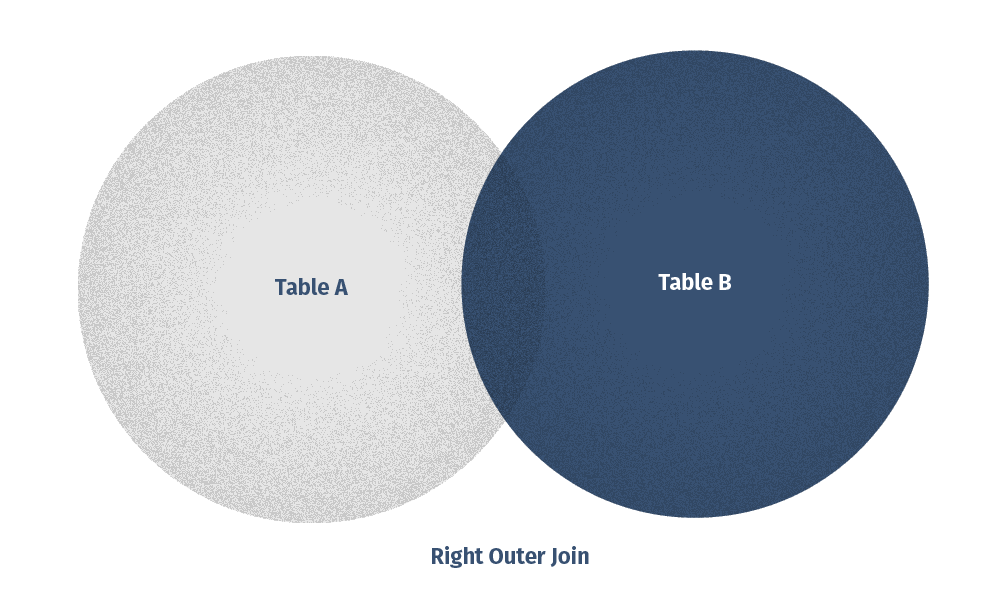
<h6><a href="https://www.devart.com/dbforge/sql/sqlcomplete/sql-join-statements.html" rel="noreferrer">[SOURCE]</a></h6>

<strong>SQL LEFT OUTER JOIN</strong><br>
<code>SELECT * FROM &lt;TableA&gt; FULL OUTER JOIN &lt;TableB&gt; ON &lt;TableA&gt;.&lt;common_column_a&gt; = &lt;TableB&gt;.&lt;common_column_b&gt;;</code>
<br>NOTE::&lt;common_column&gt; column will appear two times in result

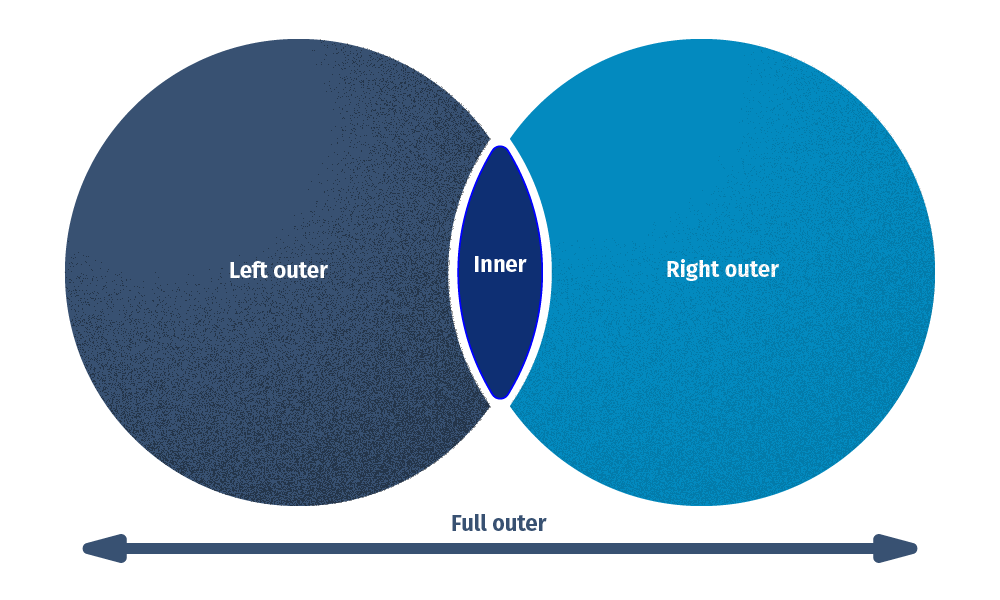
<h6><a href="https://www.devart.com/dbforge/sql/sqlcomplete/sql-join-statements.html" rel="noreferrer">[SOURCE]</a></h6>

<strong>SQL SELF JOIN</strong><br>
<code>SELECT * FROM &lt;TableA&gt; &lt;T1&gt; JOIN &lt;TableA&gt; &lt;T2&gt; ON &lt;T1&gt;.&lt;column_x&gt; = &lt;T2&gt;.&lt;column_y&gt;;</code>
<br>NOTE:: All columns will appear two times in result 
<br>NOTE:: Filter can be done using JOIN and WHERE <br>
<strong>Example</strong><br>
<code>SELECT a.*, b.employee_id AS manager_employee_id, b.FIRST_NAME AS manager_first_name, b.LAST_NAME AS manager_last_name FROM hr.employees a JOIN hr.employees b ON a.manager_id = b.employee_id </code>

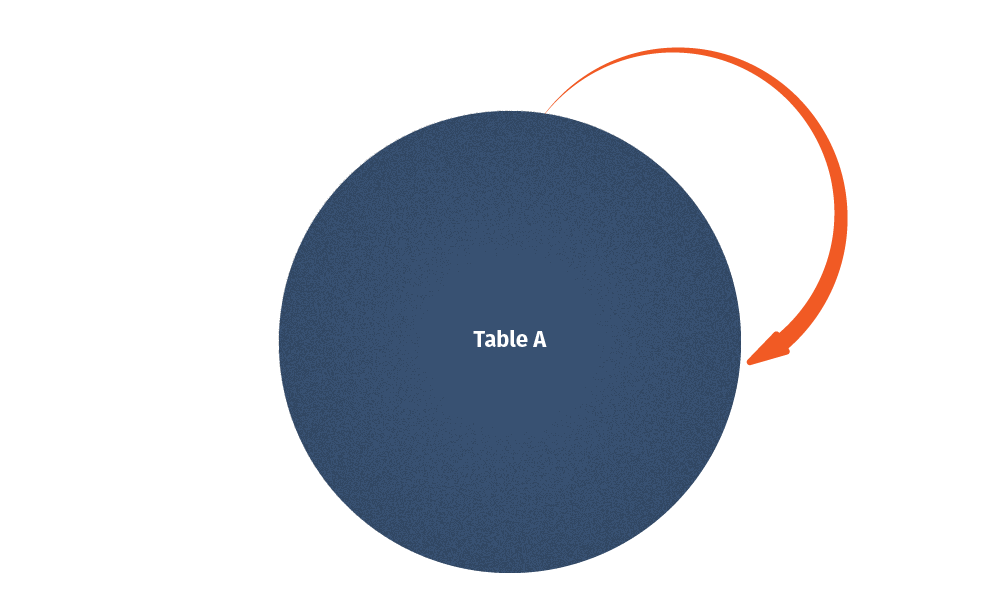
<h6><a href="https://www.devart.com/dbforge/sql/sqlcomplete/sql-join-statements.html" rel="noreferrer">[SOURCE]</a></h6>

<strong>SQL CROSS JOIN</strong><br>
<code>SELECT * FROM &lt;TableA&gt; FULL OUTER JOIN &lt;TableB&gt; ON &lt;TableA&gt;.&lt;common_column_a&gt; = &lt;TableB&gt;.&lt;common_column_b&gt;;</code>
<br>NOTE::&lt;common_column&gt; column will appear two times in result


<strong>Example</strong><br>
<code>SELECT a.TEAM_NAME AS TEAM_A, b.TEAM_NAME AS TEAM_B FROM all_teams a CROSS JOIN all_teams b WHERE a.TEAM_ID < b.TEAM_ID </code>


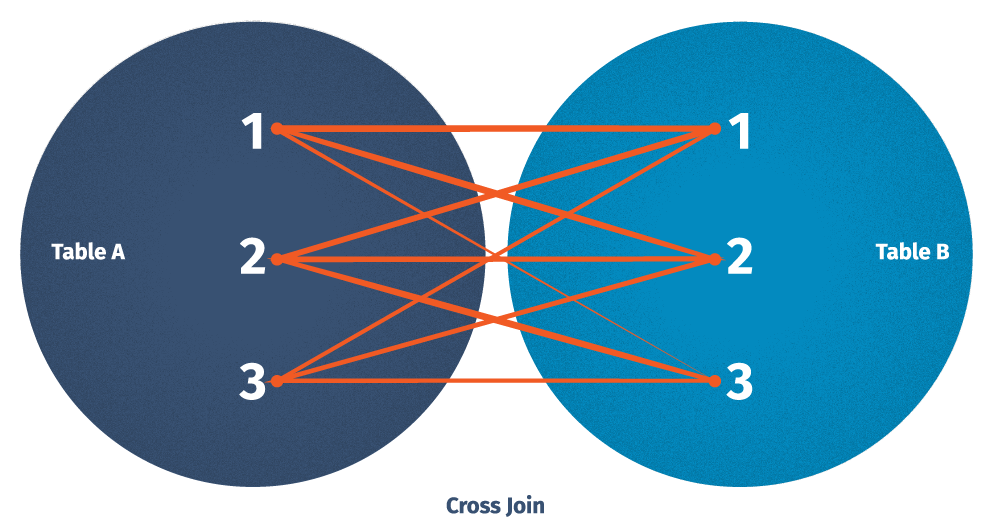
<h6><a href="https://www.devart.com/dbforge/sql/sqlcomplete/sql-join-statements.html" rel="noreferrer">[SOURCE]</a></h6>

<h2>5. UNION vs UNION ALL</h2>

<strong>UNION</strong><br>
<code>SELECT N-Columns FROM &lt;TableA&gt; UNION SELECT N-Columns FROM &lt;TableB&gt;;</code><br>
<strong>UNION ALL</strong><br>
<code>SELECT N-Columns FROM &lt;TableA&gt; UNION ALL SELECT N-Columns FROM &lt;TableB&gt;;</code><br>

<strong>Rules:</strong><br>
<ul>
<li>Same number of columns in each table</li>
<li>Columns should have <strong>same name (Sometimes)</strong>, <strong>same order</strong> and should contain <strong>related datatypes</strong> </li>
<li>For satisfying above rules, we can use following syntex:<br> <code>SELECT n-Columns, <strong>NULL AS</strong> &lt;Uncommon_column_1&gt;, <strong>NULL AS</strong> &lt;Uncommon_column_2&gt;,...</li>
<li><strong>UNION vs UNION ALL:</strong></li>
    <ul>
        <li><strong>UNION</strong> doesnot displays duplicate rows while <strong>UNION ALL</strong> displays duplicate rows.</li>
        <li><strong>UNION</strong> uses more SQL resources (computational power and storage space) as compared to <strong>UNION ALL</strong>.</li>
    </ul>
<li><strong>UNION vs UNION ALL:</strong></li><br>    
    <code>SELECT e.emp_no, e.first_name, e.last_name, NULL AS dept_no, NULL AS from_date FROM employees e WHERE last_name = 'Denis' UNION SELECT NULL AS emp_no, NULL AS first_name, NULL AS last_name, dm.dept_no, dm.from_date FROM dept_manager dm</code>
<li>SELECT * FROM () as a ORDER BY -a.emp_no DESC;</li>
</ul>

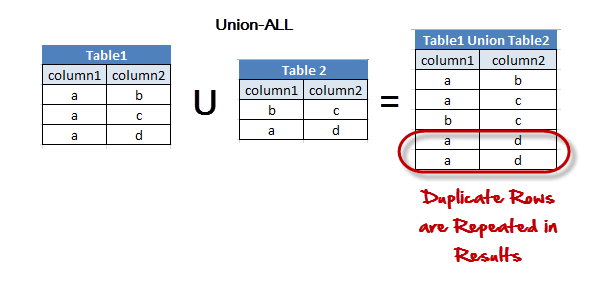
<h6><a href="https://www.guru99.com/unions.html" rel="noreferrer">[SOURCE]</a></h6>

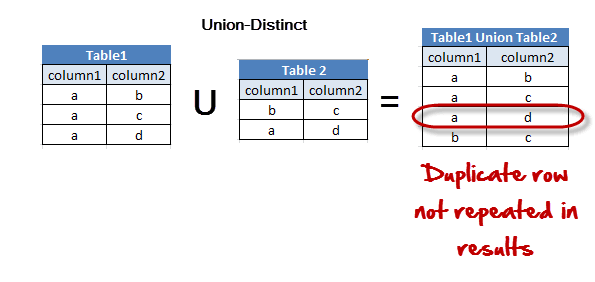
<h6><a href="https://www.guru99.com/unions.html" rel="noreferrer">[SOURCE]</a></h6>

<h2>6. COALESCE, IFNULL|NVL, NULLIF, NVL2 </h2>

<strong>Syntex:</strong><br>
<ul>
    <li><code>IFNULL/NVL(expression_1,expression_2)</code>: If &lt;expression_1&gt; is null, it will return &lt;expression_2&gt; </li>
    <li><code>NVL2(expression_1,expression_2,expression_3)</code>: If &lt;expression_1&gt; is null, it will return &lt;expression_3&gt; else it will return &lt;expression_2&gt;</li>
    <li><code>NULLIF(expression_1,expression_2)</code>: If &lt;expression_1&gt; and &lt;expression_2&gt; are same, it will return NULL, else it will return &lt;expression_1&gt;. NOTE: &lt;expression_1&gt; cannot be the keyword 'NULL'.</li>
    <li><code>COALESCE(expression_1,expression_2,....expression_N) </code>: If &lt;expression_1&gt; is null, it will return &lt;expression_2&gt;, if &lt;expression_2&gt; is NULL then it will return &lt;expression_3&gt; and so on. NOTE: if all expression are NULL, it will return NULL.</li>
</ul>

<strong>Example:</strong><br>  
<code>SELECT MANAGER_ID, NVL(MANAGER_ID,0), NVL2(MANAGER_ID,1,0), COALESCE(MANAGER_ID,0), NULLIF(MANAGER_ID,102) FROM hr.employees</code>

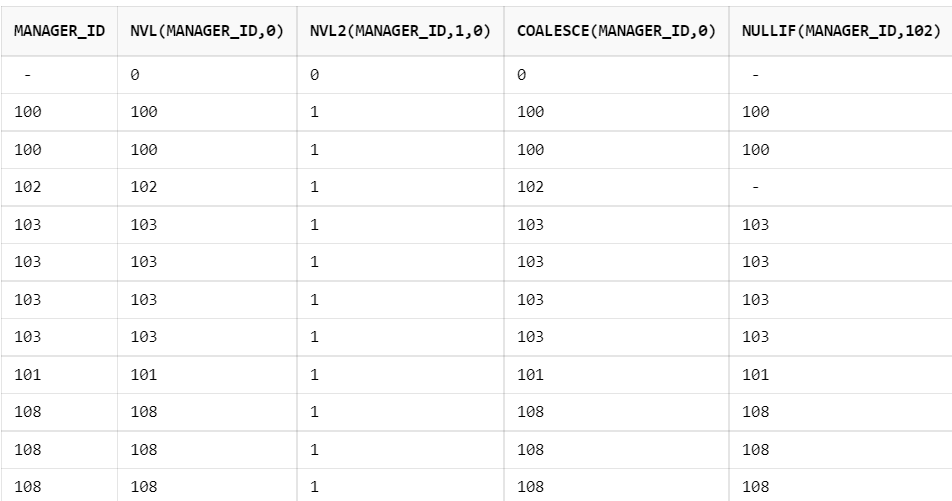

<ol start=7>
<li>Subqueries: <code>IN</code>, <code>EXISTS</code>, and inline views</li>
<li>Subqueries: Correlated</li>
<li><code>WITH</code> syntax: Subquery Factoring/CTE</li>
<li>Views</li>
</ol>

<h2>10. SQL VIEWS </h2>

<ul>
    <li><strong>SQL <code>VIEW</code>:</strong> Virtual tables whoes content are obtained from an existing table (base table)</li>
    <li> The view created <strong>doesnot</strong> contain any real data so it occupies no extra memory; the data is physically stored in the base table.</li>
    <li> Acts as a <strong>dynamic</strong> table, as changes to base table are instantly reflected.</li>
    <li> Primary use is to <strong>reduce coding time </strong></li>
</ul>

<strong>Syntex:</strong><br>  
<code>CREATE OR REPLACE VIEW &lt;view_name&gt; AS SELECT &lt;col1&gt;,&lt;col2&gt;,&lt;col3&gt;...&lt;coln&gt; FROM &lt;TableA&gt;;</code>

<strong>Example:</strong><br>  
<ul>
    <li><strong>Creating <code>VIEW</code>:</strong> <code>CREATE OR REPLACE VIEW employee_service_duration AS SELECT employee_id, MIN(join_data) AS join_data, MAX(termination_date) AS termination_date FROM hr.employees GROUP BY employee_id;</code></li>
    <li> <strong>Accessing <code>VIEW</code>:</strong> <code>SELECT * FROM db_name.employee_service_duration;</code></li>
</ul>

<h1>Advanced Topics</h1>

<h2>1. Stored routines</h2>

<strong>Stored routine:</strong> Set of SQL statements that can be stored on the database server.<br>

<ul>
<li>Whenever user need to run the routine, they can <code> CALL </code>, <code>REFERENCE</code> or <code>INVOKE</code> the routine.</li>
<li>Stored routines are of two types:</li>
    <ol>
        <li>Functions</li>
            <ul>
                <li>User defined functions</li>
                <li>In-build functions {Aggregate functions, datetime functions, ...}</li>
            </ul>
        <li>Procedures</li>
    </ol>
</ul>

<strong>Routines vs View:</strong><br>
<ul>
<li>A stored procedure uses parameters to do a function... whether it is updating and inserting data, or returning single values or data sets.</li>
<li>A view represents a <strong>virtual</strong> table.  You can join multiple tables in a view and use the view to present the data as if the data were coming from a single table.</li>
</ul>

<div class="s-prose js-post-body" itemprop="text">
<p><strong>A Stored Procedure:</strong> </p>

<ul>
<li>Accepts parameters </li>
<li>Can <strong>NOT</strong> be used as building block in a larger query </li>
<li>Can contain several statements, loops, IF ELSE, etc. </li>
<li>Can perform modifications to one or several tables </li>
<li>Can NOT be used as the target of an INSERT, UPDATE or DELETE 
statement. </li>
</ul>

<p><strong>A View:</strong> </p>

<ul>
<li>Does <strong>NOT</strong> accept parameters </li>
<li>Can be used as building block in a larger query </li>
<li>Can contain only one single SELECT query </li>
<li>Can <strong>NOT</strong> perform modifications to any table </li>
<li>But can (sometimes) be used as the target of an INSERT, UPDATE or 
DELETE statement. </li>
</ul>
</div>
    
<h6><a href="https://stackoverflow.com/questions/5194995/what-is-the-difference-between-a-stored-procedure-and-a-view" rel="noreferrer">[SOURCE]</a></h6>

<strong>Syntex:</strong><br>  
<code>

USE &lt;db_name&gt;;<br>
DELIMITER &dollar; &dollar;<br>
CREATE PRODECURE &lt;procedure_name&gt;()<br>
BEGIN<br>
    &lt;query_1&gt;;<br>
    &lt;query_2&gt;;<br>
    &lt;query_3&gt;;<br>
    ..........<br>
    &lt;query_n&gt;;<br>
END&dollar;&dollar;<br>
DELIMITER ;<br>
</code>

# SELECT

In [1]:
SELECT * FROM emp; 

SyntaxError: invalid syntax (<ipython-input-1-7daa3b746c5d>, line 1)

# Window Function

SELECT EMP_ID, DEPT_ID,EXPERTISE,SALARY,  
  
SUM(SALARY) OVER (PARTITION BY DEPT_ID) AS DEPT_SALARY,  
  
SUM(SALARY) OVER (PARTITION BY EXPERTISE) AS EXPERTISE_SALARY,  
  
ROW_NUMBER() OVER (PARTITION BY DEPT_ID ORDER BY SALARY DESC ) AS ROW_NUM ,  
  
RANK() OVER (PARTITION BY DEPT_ID ORDER BY SALARY DESC ) AS RANK_NUM,  
  
DENSE_RANK() OVER (PARTITION BY DEPT_ID ORDER BY SALARY DESC ) AS D_RANK_NUM  
  
FROM AB_EMPLOYEE  
  
ORDER BY DEPT_ID,SALARY DESC

<div class="s-Session-result"><span class="s-Session-msg"><table summary="SQL Query Results" class="u-Report">
<tbody><tr><th id="EMP_ID">EMP_ID</th><th id="DEPT_ID">DEPT_ID</th><th id="EXPERTISE">EXPERTISE</th><th id="SALARY">SALARY</th><th id="DEPT_SALARY">DEPT_SALARY</th><th id="EXPERTISE_SALARY">EXPERTISE_SALARY</th><th id="ROW_NUM">ROW_NUM</th><th id="RANK_NUM">RANK_NUM</th><th id="D_RANK_NUM">D_RANK_NUM</th></tr><tr><td headers="EMP_ID">5003</td><td headers="DEPT_ID">1</td><td headers="EXPERTISE">SCIENCE</td><td headers="SALARY">50000</td><td headers="DEPT_SALARY">150000</td><td headers="EXPERTISE_SALARY">50000</td><td headers="ROW_NUM">1</td><td headers="RANK_NUM">1</td><td headers="D_RANK_NUM">1</td></tr><tr><td headers="EMP_ID">5003</td><td headers="DEPT_ID">1</td><td headers="EXPERTISE">MATH</td><td headers="SALARY">50000</td><td headers="DEPT_SALARY">150000</td><td headers="EXPERTISE_SALARY">445556</td><td headers="ROW_NUM">2</td><td headers="RANK_NUM">1</td><td headers="D_RANK_NUM">1</td></tr><tr><td headers="EMP_ID">5003</td><td headers="DEPT_ID">1</td><td headers="EXPERTISE">ENGLISH</td><td headers="SALARY">50000</td><td headers="DEPT_SALARY">150000</td><td headers="EXPERTISE_SALARY">445556</td><td headers="ROW_NUM">3</td><td headers="RANK_NUM">1</td><td headers="D_RANK_NUM">1</td></tr><tr><td headers="EMP_ID">106</td><td headers="DEPT_ID">2</td><td headers="EXPERTISE">ENGLISH</td><td headers="SALARY">80000</td><td headers="DEPT_SALARY">641112</td><td headers="EXPERTISE_SALARY">445556</td><td headers="ROW_NUM">1</td><td headers="RANK_NUM">1</td><td headers="D_RANK_NUM">1</td></tr><tr><td headers="EMP_ID">106</td><td headers="DEPT_ID">2</td><td headers="EXPERTISE">MATH</td><td headers="SALARY">80000</td><td headers="DEPT_SALARY">641112</td><td headers="EXPERTISE_SALARY">445556</td><td headers="ROW_NUM">2</td><td headers="RANK_NUM">1</td><td headers="D_RANK_NUM">1</td></tr><tr><td headers="EMP_ID">7003</td><td headers="DEPT_ID">2</td><td headers="EXPERTISE">ENGLISH</td><td headers="SALARY">70000</td><td headers="DEPT_SALARY">641112</td><td headers="EXPERTISE_SALARY">445556</td><td headers="ROW_NUM">3</td><td headers="RANK_NUM">3</td><td headers="D_RANK_NUM">2</td></tr><tr><td headers="EMP_ID">104</td><td headers="DEPT_ID">2</td><td headers="EXPERTISE">ENGLISH</td><td headers="SALARY">70000</td><td headers="DEPT_SALARY">641112</td><td headers="EXPERTISE_SALARY">445556</td><td headers="ROW_NUM">4</td><td headers="RANK_NUM">3</td><td headers="D_RANK_NUM">2</td></tr><tr><td headers="EMP_ID">7003</td><td headers="DEPT_ID">2</td><td headers="EXPERTISE">MATH</td><td headers="SALARY">70000</td><td headers="DEPT_SALARY">641112</td><td headers="EXPERTISE_SALARY">445556</td><td headers="ROW_NUM">5</td><td headers="RANK_NUM">3</td><td headers="D_RANK_NUM">2</td></tr><tr><td headers="EMP_ID">104</td><td headers="DEPT_ID">2</td><td headers="EXPERTISE">MATH</td><td headers="SALARY">70000</td><td headers="DEPT_SALARY">641112</td><td headers="EXPERTISE_SALARY">445556</td><td headers="ROW_NUM">6</td><td headers="RANK_NUM">3</td><td headers="D_RANK_NUM">2</td></tr><tr><td headers="EMP_ID">6003</td><td headers="DEPT_ID">2</td><td headers="EXPERTISE">MATH</td><td headers="SALARY">50556</td><td headers="DEPT_SALARY">641112</td><td headers="EXPERTISE_SALARY">445556</td><td headers="ROW_NUM">7</td><td headers="RANK_NUM">7</td><td headers="D_RANK_NUM">3</td></tr><tr><td headers="EMP_ID">6003</td><td headers="DEPT_ID">2</td><td headers="EXPERTISE">ENGLISH</td><td headers="SALARY">50556</td><td headers="DEPT_SALARY">641112</td><td headers="EXPERTISE_SALARY">445556</td><td headers="ROW_NUM">8</td><td headers="RANK_NUM">7</td><td headers="D_RANK_NUM">3</td></tr><tr><td headers="EMP_ID">107</td><td headers="DEPT_ID">2</td><td headers="EXPERTISE">MATH</td><td headers="SALARY">50000</td><td headers="DEPT_SALARY">641112</td><td headers="EXPERTISE_SALARY">445556</td><td headers="ROW_NUM">9</td><td headers="RANK_NUM">9</td><td headers="D_RANK_NUM">4</td></tr><tr><td headers="EMP_ID">107</td><td headers="DEPT_ID">2</td><td headers="EXPERTISE">ENGLISH</td><td headers="SALARY">50000</td><td headers="DEPT_SALARY">641112</td><td headers="EXPERTISE_SALARY">445556</td><td headers="ROW_NUM">10</td><td headers="RANK_NUM">9</td><td headers="D_RANK_NUM">4</td></tr><tr><td headers="EMP_ID">105</td><td headers="DEPT_ID">3</td><td headers="EXPERTISE">MATH</td><td headers="SALARY">75000</td><td headers="DEPT_SALARY">150000</td><td headers="EXPERTISE_SALARY">445556</td><td headers="ROW_NUM">1</td><td headers="RANK_NUM">1</td><td headers="D_RANK_NUM">1</td></tr><tr><td headers="EMP_ID">105</td><td headers="DEPT_ID">3</td><td headers="EXPERTISE">ENGLISH</td><td headers="SALARY">75000</td><td headers="DEPT_SALARY">150000</td><td headers="EXPERTISE_SALARY">445556</td><td headers="ROW_NUM">2</td><td headers="RANK_NUM">1</td><td headers="D_RANK_NUM">1</td></tr>
</tbody></table><br>15 rows selected.</span>
                                </div>

source: https://livesql.oracle.com/apex/livesql/file/content_FHXEW8QV9BNS5LUN2GTMYWWFL.html

# Resources

<ol>
<li><code>Oracle</code>:: <a href="https://livesql.oracle.com/apex/f?p=590:1000">livesql.oracle.com/apex</a></li>
<li><code>Oracle Apex Lab</code>:: <a href="https://apex.oracle.com/pls/apex/">livesql.oracle.com/apex</a></li>
<li><code>Towardsdatascience</code>:: <a href="https://towardsdatascience.com/ten-advanced-sql-concepts-you-should-know-for-data-science-interviews-4d7015ec74b0">Ten Advanced SQL Concepts You Should Know for Data Science Interviews</a></li>
    
<li><code>Udemy</code>:: <a href="https://tigeranalytics.udemy.com/course/the-complete-sql-bootcamp/">The Complete SQL Bootcamp 2022: Go from Zero to Hero</a></li>
<li><code>Udemy</code>:: <a href="https://tigeranalytics.udemy.com/course/sql-advanced/">Advanced SQL : SQL Expert Certification Preparation Course</a></li>
<li><code>Udemy</code>:: <a href="https://tigeranalytics.udemy.com/course/advanced-sql-mysql-for-analytics-business-intelligence/l">Advanced SQL: MySQL Data Analysis & Business Intelligence</a></li>
<li><code>Kaggle</code>:: <a href="https://www.kaggle.com/learn/advanced-sql">Advanced SQL</a></li>
<li><code>SQLzoo</code>:: <a href="https://sqlzoo.net/wiki/SQL_Tutorial">SQL Tutorial</a></li>
<li><code>TutorialsPoint</code>:: <a href="https://www.tutorialspoint.com/plsql/">PL/SQL Tutorial</a></li>
</ol>